# STEP 1: Set up a Jupyter notebook with visualization libraries, and import the cleaned data set you chose in the previous Exercise.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import re

In [3]:
df_cleaned = pd.read_csv(r'C:\Users\PC\Documents\zomato_cleaned.csv', index_col = False)

# STEP 2: Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis. For instance, discard “ID,” “date,” and “index” variables.

### Renaming Columns

In [8]:
df_cleaned.rename(columns = {'listed_in(type)' : 'theme'}, inplace = True)

In [10]:
df_cleaned.rename(columns = {'listed_in(city)' : 'city'}, inplace = True)

In [12]:
df_cleaned.rename(columns = {'approx_cost(for two people)' : 'cost'}, inplace = True)

In [14]:
df_cleaned.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,theme,city
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Dropping Columns

In [17]:
df_variables= df_cleaned.drop(columns = ['Unnamed: 0', 'url', 'phone', 'dish_liked', 'reviews_list', 'menu_item', 'address'])

In [19]:
df_variables.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,theme,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# STEP 3: Create a correlation matrix heatmap (colored). Discuss what the coefficients in the plot mean in terms of the relationships between the variables

In [22]:
df_variables['rate'] = df_variables['rate'].astype(str)

In [28]:
df_variables['rate'] = df_variables['rate'].astype(str).str.strip()

In [42]:
df_variables['rate'] = df_variables['rate'].str.replace(" ", "", regex=False)

In [58]:
print(df_variables['rate'].value_counts(dropna=False))

rate
3.9    3238
4.0    2860
4.1    2786
3.8    2473
4.2    2097
4.3    1671
3.7    1639
4.4    1123
3.6     875
4.5     630
3.5     482
3.4     351
2.8     315
2.9     309
3.1     307
4.6     294
3.0     291
3.2     249
3.3     218
2.7     190
4.7     167
NaN     147
2.6     138
4.8      66
2.5      57
4.9      55
2.4      54
2.3      45
2.2      26
2.1      24
2.0      11
1.8       5
Name: count, dtype: int64


In [66]:
df_variables['rate'] = df_variables['rate'].replace({',': ''}, regex=True).astype(float)
df_variables['cost'] = df_variables['cost'].replace({',': ''}, regex=True).astype(float)

In [68]:
corr_matrix = df_variables[['rate', 'cost']].corr()

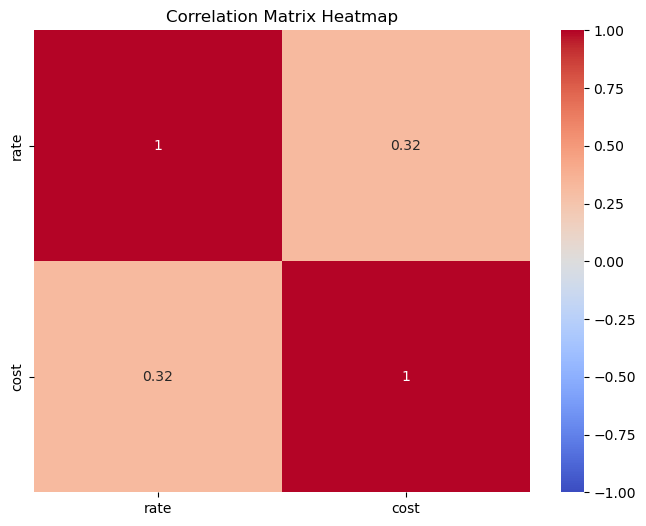

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

### A correlation of 0.32 between cost and rate indicates a positive relationship between the two variables, although it is not very strong. This means that, generally, as the cost increases, the rate tends to increase as well, but the relationship is not strong enough to be considered a significant correlation.

### Heatmap: Top 10 Locations by Restaurant Count

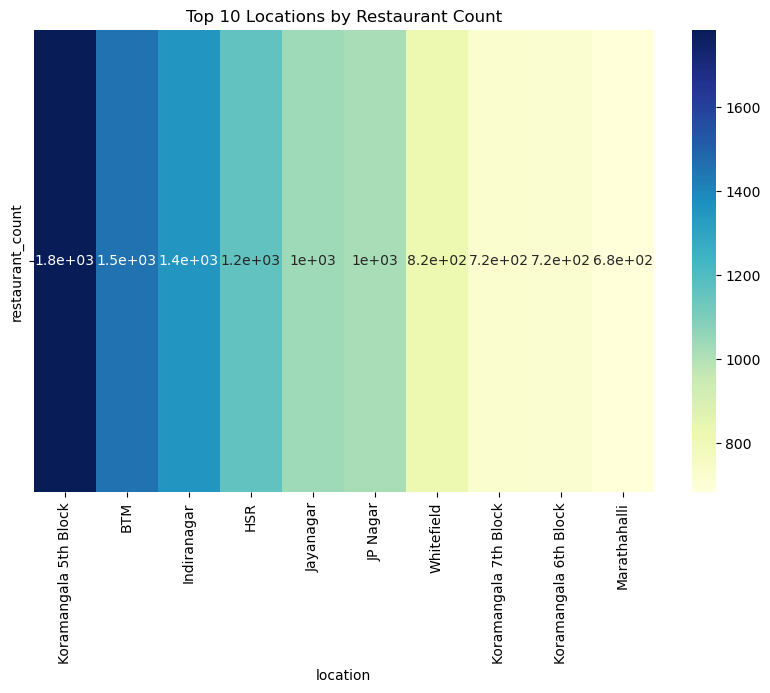

In [85]:
top_locations = df_variables.groupby('location').size().sort_values(ascending=False).head(10)

# Create a DataFrame for the heatmap
location_data = top_locations.reset_index()
location_data.columns = ['location', 'restaurant_count']

# Check if the DataFrame is not empty
if location_data.empty:
    print("No data available for locations.")
else:
    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(location_data.set_index('location').T, annot=True, cmap='YlGnBu')
    plt.title("Top 10 Locations by Restaurant Count")
    plt.show()

# STEP 4 Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.


In [119]:
locations_of_interest = ["South Bangalore", "East Bangalore", "North Bangalore", "Central Bangalore", "West Bangalore"]

filtered_data = df_variables[df_variables['location'].isin(locations_of_interest)][['location', 'city']]

print(filtered_data)

                location                   city
176      South Bangalore           Banashankari
287      South Bangalore           Banashankari
366      South Bangalore           Banashankari
1259     South Bangalore           Basavanagudi
1334     South Bangalore           Basavanagudi
1487     South Bangalore           Basavanagudi
1733     South Bangalore              Bellandur
1793      East Bangalore              Bellandur
3027      East Bangalore            Brookefield
4285     South Bangalore                    BTM
6008     South Bangalore        Electronic City
6343     North Bangalore            Frazer Town
6999     South Bangalore                    HSR
7144     South Bangalore                    HSR
8053      East Bangalore            Indiranagar
8689     South Bangalore              Jayanagar
9216     South Bangalore              Jayanagar
9269     South Bangalore              Jayanagar
9595     South Bangalore              Jayanagar
9718     South Bangalore               J

In [108]:
filtered_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,theme,city
176,As On Fire,Yes,No,3.5,41,South Bangalore,Food Truck,"Pizza, Fast Food, BBQ",400.0,Delivery,Banashankari
287,As On Fire,Yes,No,3.5,41,South Bangalore,Food Truck,"Pizza, Fast Food, BBQ",400.0,Dine-out,Banashankari
366,Belly Squad Food Truck,No,No,3.8,55,South Bangalore,Food Truck,"Chinese, Rolls, Biryani, Momos",300.0,Dine-out,Banashankari
1259,As On Fire,Yes,No,3.5,41,South Bangalore,Food Truck,"Pizza, Fast Food, BBQ",400.0,Delivery,Basavanagudi
1334,Belly Squad Food Truck,No,No,3.8,55,South Bangalore,Food Truck,"Chinese, Rolls, Biryani, Momos",300.0,Dine-out,Basavanagudi


In [110]:
filtered_df.shape

(35, 11)

In [112]:
# Ensure 'cost' is numeric
filtered_df['cost'] = pd.to_numeric(filtered_df['cost'], errors='coerce')

# Select numerical variables
numerical_df = filtered_df[['rate', 'votes', 'cost']]

# Calculate correlation matrix
corr_matrix = numerical_df.corr()
print(corr_matrix)

           rate     votes      cost
rate   1.000000  0.272896 -0.606316
votes  0.272896  1.000000  0.059226
cost  -0.606316  0.059226  1.000000


C:\Users\PC\AppData\Local\Temp\ipykernel_17264\1379380647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cost'] = pd.to_numeric(filtered_df['cost'], errors='coerce')


In [114]:
# Properly update using .loc to avoid the warning
filtered_df.loc[:, 'cost'] = pd.to_numeric(filtered_df['cost'], errors='coerce')

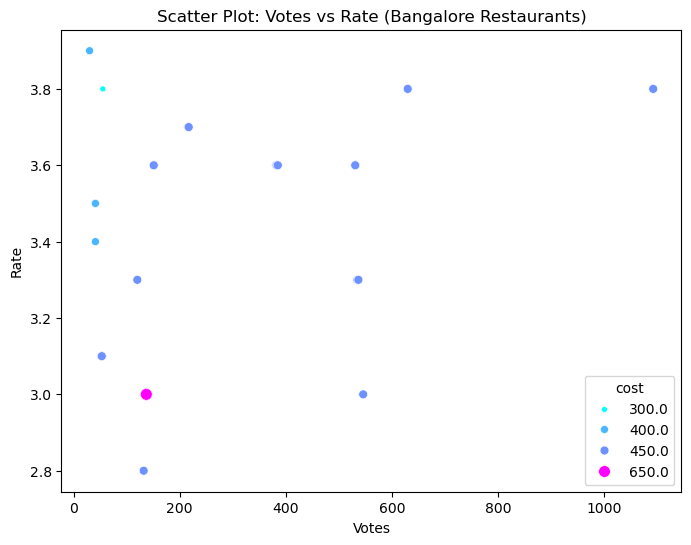

In [116]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='votes', y='rate', hue='cost', palette='cool', size='cost')
plt.title("Scatter Plot: Votes vs Rate (Bangalore Restaurants)")
plt.xlabel("Votes")
plt.ylabel("Rate")
plt.show()

### The scatter plot above visualizes the relationship between votes and rate for restaurants in Bangalore. The scatter plot doesnt show a strong relationship between the numerical variables that the DF contains. The color and size represent the cost, revealing how pricing influences popularity and ratings. Any outliers would highlight unique restaurants with unusual vote or rating patterns.

# STEP 5 Create a pair plot of the entire data set. Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

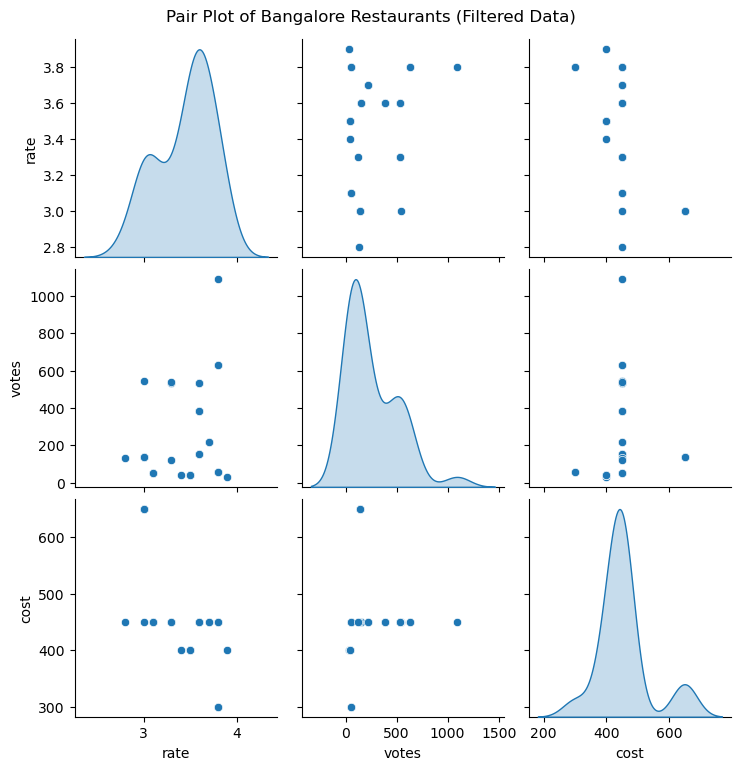

In [125]:
# Select numerical variables
numerical_df = filtered_df[['rate', 'votes', 'cost']]

# Drop rows with missing values in numerical columns
numerical_df = numerical_df.dropna()

# Pair plot
sns.pairplot(numerical_df, diag_kind='kde')
plt.suptitle("Pair Plot of Bangalore Restaurants (Filtered Data)", y=1.02)
plt.show()

### Distribution of Individual Variables (KDE Plots on the Diagonal):

Rate: The distribution is left-skewed, with most ratings between 3.0 and 3.8. This suggests that most restaurants are rated fairly well, but very high or low ratings are rare.

Votes: The distribution is highly skewed to the right, indicating most restaurants have low vote counts, but a few are exceptionally popular.

Cost: The distribution is narrowly clustered around 300-500, suggesting that restaurant pricing is relatively consistent in Bangalore, with few outliers.

### Relationships Between Variables (Scatter Plots):

Rate vs Votes: There appears to be no strong linear relationship between rating and the number of votes. However, a slight trend shows that restaurants with more votes tend to have slightly higher ratings. This could indicate that popular spots often get better reviews, possibly due to visibility bias.

Cost vs Rate: The scatter plot shows no clear relationship between cost and rating. Pricing does not seem to directly impact ratings, which may suggest that quality or experience matters more than cost.

Cost vs Votes: There’s no strong correlation between cost and votes, but a slight concentration of votes around specific price points may indicate popular price ranges.



### Variables to Explore Further and Why:
#### Votes vs Rate:

Further exploration could reveal if high ratings genuinely attract more attention or if popular places get better reviews due to their reputation.

Segmenting the data by cuisine or theme could provide more context.

#### Cost vs Rate:

Investigating if premium pricing aligns with higher ratings or if value-for-money spots are better appreciated.

Grouping by location or cuisine type could add insight.

#### Votes vs Cost:

Understanding if expensive places are more or less popular could help gauge spending behavior.

Exploring this relationship within specific areas or restaurant types might provide deeper insights.

# STEP 6 Create a categorical plot and interpret the results.

<Figure size 1200x600 with 0 Axes>

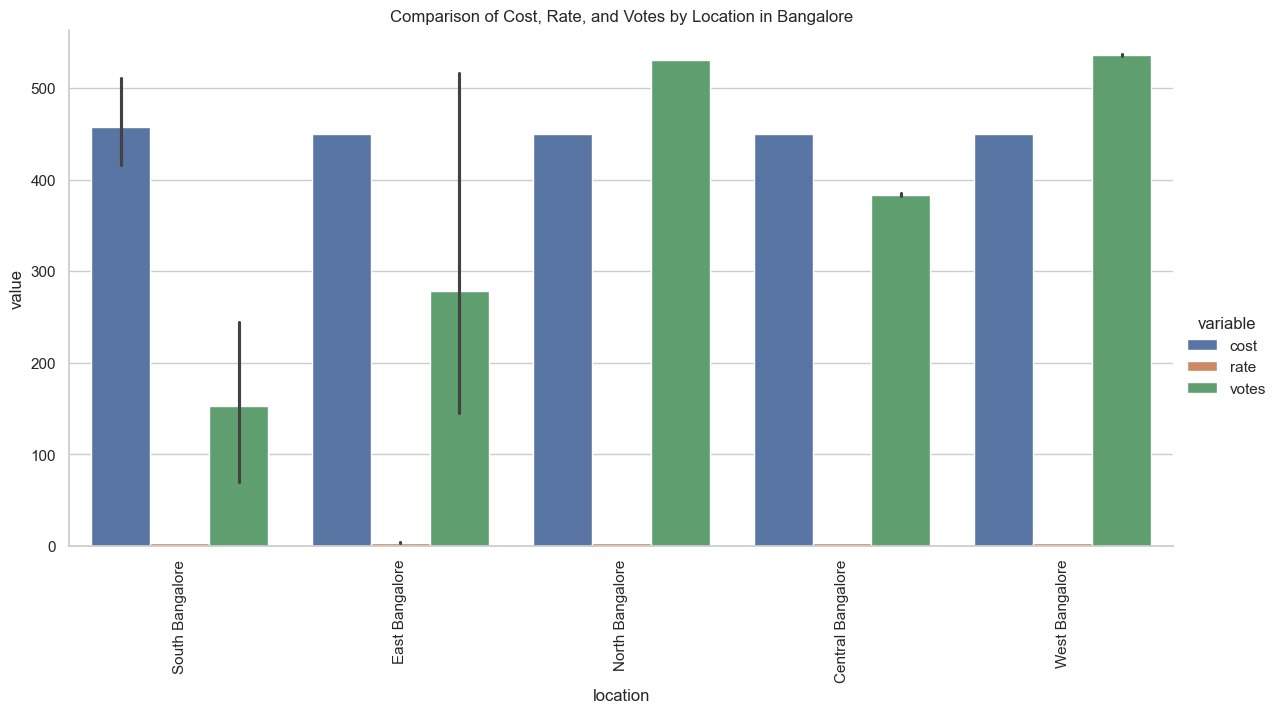

In [134]:
# Categorical plot comparing cost, rate, and votes across locations
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Melt data to use in catplot
melted_df = filtered_df.melt(id_vars=["location"], value_vars=["cost", "rate", "votes"])

# Create the plot
sns.catplot(
    data=melted_df,
    x="location",
    y="value",
    hue="variable",
    kind="bar",
    height=6,
    aspect=2
)

plt.xticks(rotation=90)
plt.title("Comparison of Cost, Rate, and Votes by Location in Bangalore")
plt.show()

### Interpreting the Results:
#### Cost by Location:

Some locations tend to have higher average costs, indicating upscale dining areas.

Areas with lower average costs may cater to more budget-friendly dining options.

#### Rate by Location:

Ratings are fairly consistent across locations, but certain neighborhoods seem to have higher ratings, possibly due to a concentration of premium restaurants.

#### Votes by Location:

Higher vote counts in certain locations suggest popular or well-known dining hubs.

Low vote counts in specific areas may indicate less foot traffic or less popular dining spots.



# STEP 7 Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

1.	Which neighborhoods have the highest concentration of restaurants?

In [141]:
print(top_locations)

location
Koramangala 5th Block    1783
BTM                      1456
Indiranagar              1350
HSR                      1162
Jayanagar                1037
JP Nagar                 1016
Whitefield                824
Koramangala 7th Block     725
Koramangala 6th Block     720
Marathahalli              683
dtype: int64


2.	What types of cuisines are most popular?

C:\Users\PC\AppData\Local\Temp\ipykernel_17264\1621757292.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")


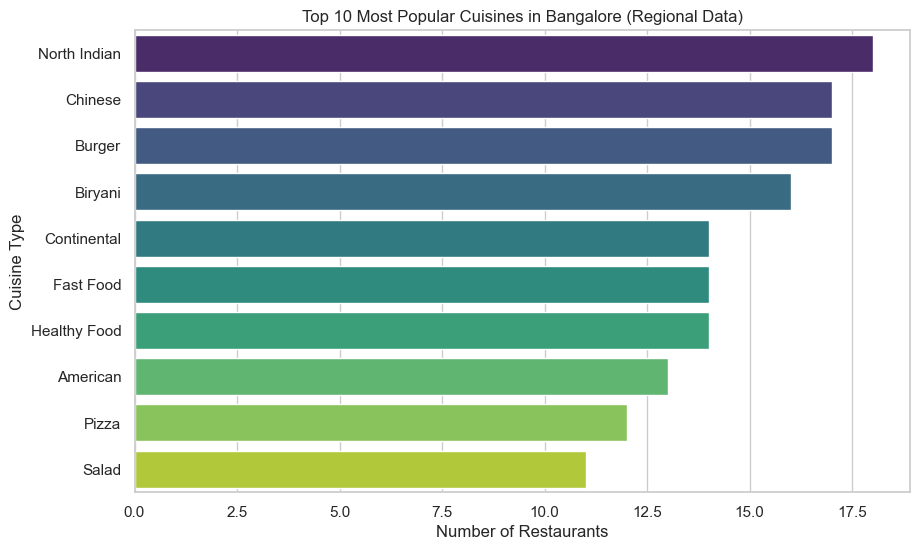

In [146]:
# Filter data for Bangalore regions
bglr_regions = ["South Bangalore", "East Bangalore", "North Bangalore", "Central Bangalore", "West Bangalore"]
regional_df = filtered_df[filtered_df['location'].isin(bglr_regions)]

# Split cuisines column into individual cuisine types
regional_df['cuisines'] = regional_df['cuisines'].str.split(', ')

# Explode the list into individual rows
exploded_df = regional_df.explode('cuisines')

# Count the occurrences of each cuisine type
top_cuisines = exploded_df['cuisines'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.title("Top 10 Most Popular Cuisines in Bangalore (Regional Data)")
plt.show()

3.	What are the average costs for dining in different neighborhoods?

C:\Users\PC\AppData\Local\Temp\ipykernel_17264\964390939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost.values, y=avg_cost.index, palette="coolwarm")


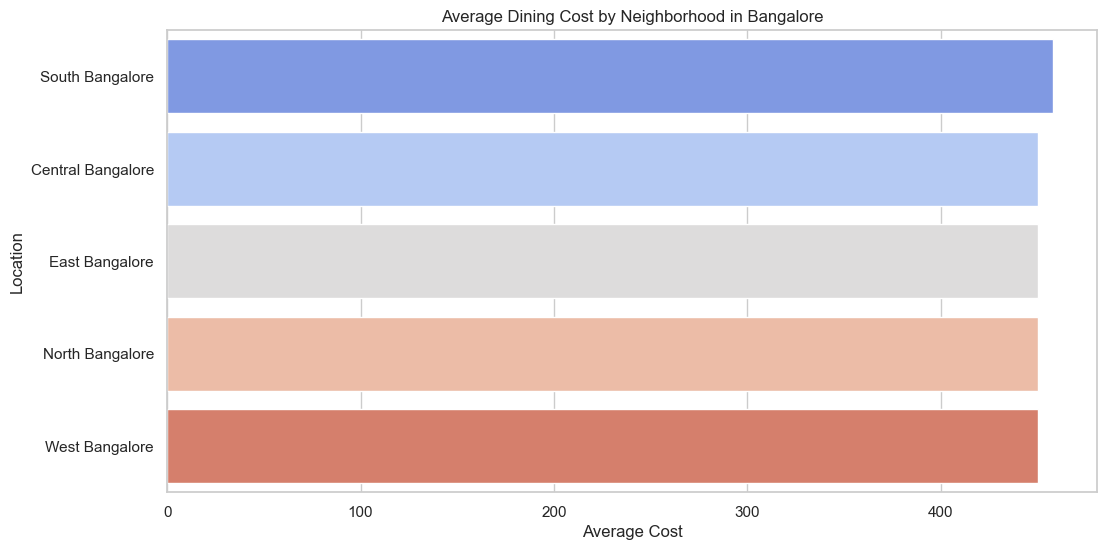

In [148]:
# Calculate average cost per location
avg_cost = filtered_df.groupby('location')['cost'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_cost.values, y=avg_cost.index, palette="coolwarm")
plt.xlabel("Average Cost")
plt.ylabel("Location")
plt.title("Average Dining Cost by Neighborhood in Bangalore")
plt.show()

#### Averge Cost 450

### 4.	Which neighborhoods have the highest-rated restaurants?

C:\Users\PC\AppData\Local\Temp\ipykernel_17264\3383827400.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values[:10], y=avg_rating.index[:10], palette="magma")


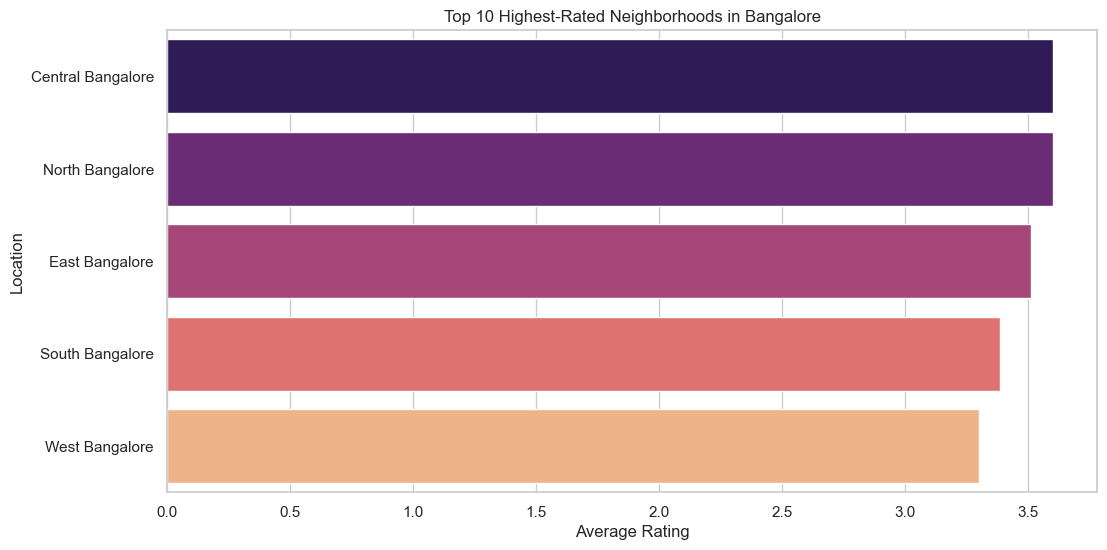

In [151]:
# Calculate average rating per location
avg_rating = filtered_df.groupby('location')['rate'].mean().sort_values(ascending=False)

# Plot the top 10 highest-rated neighborhoods
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating.values[:10], y=avg_rating.index[:10], palette="magma")
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.title("Top 10 Highest-Rated Neighborhoods in Bangalore")
plt.show()

### Central and North Bangalore are the locations with top rating

### 5.	How does restaurant popularity vary by location, theme, or cuisine type?

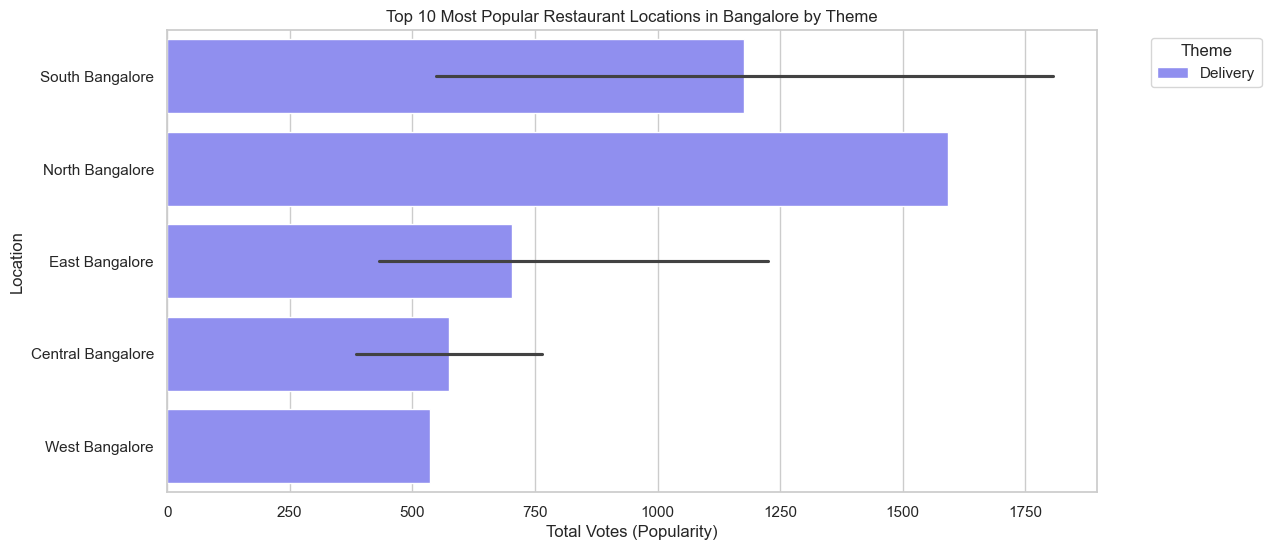

In [154]:
# Group data by location, theme, and cuisines, and sum the votes
popularity_df = filtered_df.groupby(['location', 'theme', 'rest_type', 'cuisines'])['votes'].sum().reset_index()

# Sort values by votes
popularity_df = popularity_df.sort_values(by="votes", ascending=False).head(10)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(
    data=popularity_df,
    x="votes",
    y="location",
    hue="theme",
    palette="cool"
)
plt.xlabel("Total Votes (Popularity)")
plt.ylabel("Location")
plt.title("Top 10 Most Popular Restaurant Locations in Bangalore by Theme")
plt.legend(title="Theme", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

#### North Bangalore is the one with the most votes according the Theme 'Delivery'

# STEP 8 Define any hypotheses that you can at this point. You’ll be testing these later on.

#### Hypotheses:

a) If restaurants cater to the popular cuisine preferences of each locality, then customer satisfaction and ratings will increase.

b) If theme-based restaurants are established in areas with high nightlife demand, then their popularity and profitability will rise.

c) If new restaurants understand neighborhood demographics, such as vegetarian preferences, then they can better compete with established businesses
